In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/imdb_data.csv")

In [5]:
#Lets check whether the data is load or not. check first 5 rows

In [6]:
df.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [7]:
#basic information about dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


- The dataset contain 3348 rows and 12 columns

- There are 6 object data type . 4 integer columns, 2 float columns.

- isAdult column showing int. we need to convert this columns into Yes and No format to analyse the data properly.

- release_date column is an object , which should be converted to date time format or  we seperate the date, year and month for better analysis.

In [9]:
#lets check for the missing values.


In [10]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,51


- gross (51 missing values )

- gross represent total earning of a movies. missing values may indicate that data was unavailable or the movie is underperformed.

-possible solution - 1 -missing values replace with mean or median

2 - drop rows with missing values - 51 rows will be droped from the dataset

3 - If budget is available . then we estimate the gross using a median.


- missing release dates - incomplete record.
- possible solution rop the rows.

In [11]:
#lets replace the missing values of gross with KNN imputation

In [12]:
from sklearn.impute import KNNImputer

In [13]:
imputer = KNNImputer(n_neighbors=5)

In [14]:
df[['budget', 'gross']] = imputer.fit_transform(df[['budget', 'gross']])

In [15]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0


In [16]:
#drop release date rows

In [17]:
df = df.dropna(subset=['release_date'])

In [18]:
df.shape

(3343, 12)

- After successfully removing the null values we have clean dataset.

- total 3343 rows and 12 columns.

- so lets start to do EDA

In [19]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

In [20]:
#lets find out  How many unique movies are in the dataset?

In [22]:
df['id'].nunique()

3343

so we have 3343 unique movies. so that mean we dont have any duplicated values in the dataset.

In [23]:
#lets check the overall distribution of movie runtime.

Text(0.5, 1.0, 'Distribution of Movie Runtime')

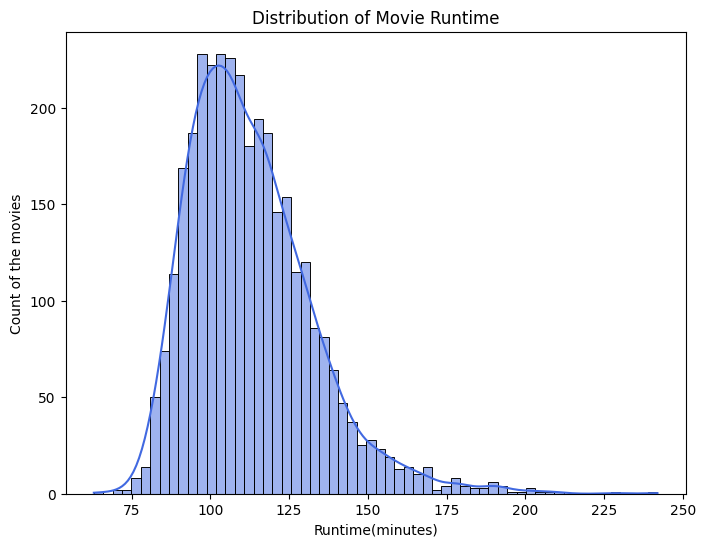

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(df['runtimeMinutes'], bins=60, kde=True, color='royalblue')
plt.xlabel("Runtime(minutes)")
plt.ylabel("Count of the movies")
plt.title("Distribution of Movie Runtime")

In [31]:
#as we see the distribution. it seems like normal distribution. but lets check for the outliers also

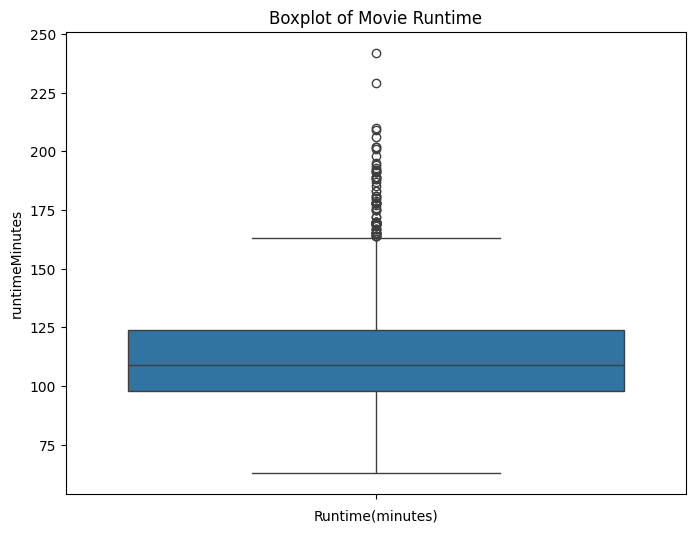

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(df['runtimeMinutes'])
plt.xlabel("Runtime(minutes)")
plt.title("Boxplot of Movie Runtime")
plt.savefig("Runtime.png", dpi=300)

In [35]:
#lets check How many movies are marked as "Adult" (isAdult=1) vs. non-adult (isAdult=0)?

In [36]:
df['isAdult'].unique()

array([0])

- as weseen we have only one category in adult section.

- that mean all movies is only for Adult

- so for better analysis we drop the adult column

In [37]:
df.drop(columns=['isAdult'], inplace=True)

In [38]:
#What are the top 10 most common movie genres?

In [39]:
df.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold


In [42]:
genres_list = df['genres'].str.split(",").explode()

In [43]:
genres_list

,genres
0,Comedy
0,Fantasy
0,Romance
1,Adventure
1,Animation
...,...
3346,Adventure
3346,Horror
3347,Comedy
3347,Crime


In [46]:
genres_counts = genres_list.value_counts().head(10)

In [47]:
genres_counts

,count
genres,
Drama,1542
Comedy,1176
Action,1171
Adventure,894
Crime,652
Thriller,632
Romance,441
Horror,402
Mystery,376


<ipython-input-49-4d1000c1601d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_counts.index, y=genres_counts.values, palette='viridis')


Text(0, 0.5, 'Number of movies')

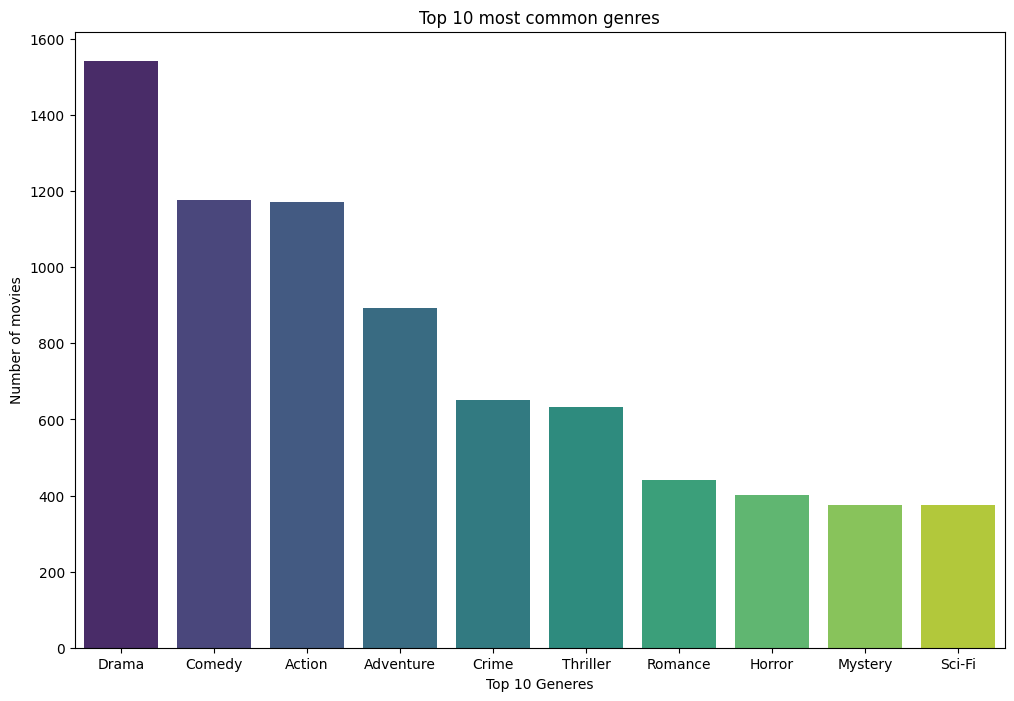

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x=genres_counts.index, y=genres_counts.values, palette='viridis')
plt.title("Top 10 most common genres")
plt.xlabel("Top 10 Generes")
plt.ylabel("Number of movies")

- Drama is the most dminant genre with 1542 movies

-comedy and action are almost eqal ~ 1170

- Adventure , crime and thriller are strong contenders -

-romance , horror, mystery an si-fi are mid tier genres.